# Import

In [9]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import time
import copy
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, TensorDataset, DataLoader, random_split, SubsetRandomSampler
import torchvision.models as models
from torch.utils.tensorboard import SummaryWriter
import pytorch_lightning as pl
from pytorch_lightning import Trainer
import os
import re
import shutil
import sys
import ipywidgets
from scipy import stats
from os import listdir
from textwrap import wrap
import statistics
from sklearn.metrics import r2_score
#from pytorch_lightning.callbacks import ModelCheckpoint

ModuleNotFoundError: No module named 'torch'

In [ ]:
AVAIL_GPUS = torch.cuda.device_count()
print(AVAIL_GPUS)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [1]:
rows = []
for i in range(57):
    rows.append(i)

In [43]:
cols = []
for i in range(38):
    cols.append(i)

In [2]:
# just for 2030
rows_2030 = [0,3, 6, 9, 12, 15, 18, 21, 24, 27, 28, 29, 30, 31, 32, 33, 51, 54]

In [21]:
srows_2030 = []
for i in range(57):
    if i not in rows_2030:
        srows_2030.append(i)

In [63]:
print(srows_2030)

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 55, 56]


In [3]:
cols_2030 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 15, 18, 23, 26, 29, 32, 35]

In [4]:
    cols_2040 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 16, 19, 21, 24, 27, 30, 33, 36]

In [5]:
cols_2050 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 14, 17, 20, 22, 25, 28, 31, 34, 37]

In [6]:
import pandas as pd
df_2030 = pd.read_excel('Clusters_3_removed.xlsx', header = 0, 
                        usecols = cols_2030, nrows = 57, engine='openpyxl')

In [10]:
df_2040 = pd.read_excel('Clusters_3_removed.xlsx', header = 0, 
                        usecols = cols_2040, nrows = 57, engine='openpyxl')

In [44]:
df_2050 = pd.read_excel('Clusters_3_removed.xlsx', header = 0, 
                        usecols = cols_2050, nrows = 57, engine='openpyxl')

In [34]:
cols2030_names = ['CC_Coal', 'CC_Diesel', 'CC_Gas', 'CC_Nuclear', 'CC_Peaker', 'CC_Waste', 'CC_Wind',
                          'CC_Solar', 'Carbon Tax', 'AGR_BC', 'AGR_AB', 'AGR_Sk', 'AGR_MB', 'AGR_QC', 'AGR_NB',
                          'AGR_PE', 'AGR_NS', 'AGR_NL' ]

In [49]:
rows2030_names = ['CE_AB', 'CE_SK', 'CE_MB', 'CE_ON', 'CE_QC','CE_NB','CE_NF','CE_NS','CE_PE','GG_AB'
                 ,'GG_SK','GG_MB', 'GG_QB', 'GG_NB', 'GG_NS', 'WG_PE', 'GG_Canada', 'WG_Canada']

In [35]:
df_2030_2 = df_2030.set_axis(cols2030_names, axis=1)

In [50]:
df_2030_2 = df_2030_2.set_axis(rows2030_names, axis=0)

In [41]:
print(df_2030_2)

           CC_Coal  CC_Diesel  CC_Gas  CC_Nuclear  CC_Peaker  CC_Waste  \
CE_AB            3          3       3           3          3         3   
CE_SK            3          3       1           3          3         3   
CE_MB            3          3       7           3          3         3   
CE_ON            3          3       2           3          3         3   
CE_QC            3          3       3           3          3         3   
CE_NB            3          3       2           3          3         3   
CE_NF            3          3       1           3          3         3   
CE_NS            3          3       2           3          3         3   
CE_PE            3          3       8           3          3         3   
GG_AB            3          3       3           3          3         3   
GG_SK            3          3       6           3          3         3   
GG_MB            3          3       7           3          3         3   
GG_QB            3          3       3 

In [12]:
from pandas import DataFrame
df_2030 = df_2030.drop([1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 55, 56])
print(df_2030)

    0   1   2   3   4   5   6   7   8   9   12  15  18  23  26  29  32  35
0    3   3   3   3   3   3   6   3   3   5   5   5   5   5   5   5   5   5
3    3   3   1   3   3   3   6   3   5   5   5   5   5   5   5   5   5   5
6    3   3   7   3   3   3   5   3   2   4   4   4   4   4   4   4   4   4
9    3   3   2   3   3   3   5   3   3   3   3   3   3   3   3   3   3   3
12   3   3   3   3   3   3   5   3   3   4   4   4   4   4   4   4   4   4
15   3   3   2   3   3   3   5   3   4   3   3   3   3   3   3   3   3   3
18   3   3   1   3   3   3   5   3   5   4   4   4   3   3   3   3   2   5
21   3   3   2   3   3   3   5   3   4   3   3   3   3   3   3   3   3   3
24   3   3   8   3   3   3   6   3   3   4   4   4   4   4   4   4   4   4
27   3   3   3   3   3   3   6   3   3   5   5   5   5   5   5   5   5   5
28   3   3   6   3   3   3   6   3   8   5   5   5   5   5   5   5   5   5
29   3   3   7   3   3   3   5   3   2   4   4   4   4   4   4   4   4   4
30   3   3   3   3   3   

In [32]:
list2040 =[1, 4, 7, 10, 13, 16, 19, 22, 25, 34, 35, 36, 37, 38, 39, 40, 41, 52, 55]

drop_rows_2040 = []
for i in range(57):
    if i not in list2040:
        drop_rows_2040.append(i)

In [34]:
print(drop_rows_2040)

[0, 2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18, 20, 21, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56]


In [36]:
from pandas import DataFrame
df_2040 = df_2040.drop(drop_rows_2040)
print(df_2040)

    0   1   2   3   4   5   6   7   8   10  13  16  19  21  24  27  30  33  36
1    3   3   3   3   3   3   6   3   3   5   5   5   5   5   5   5   5   5   5
4    3   3   3   3   3   3   6   3   3   5   5   5   5   5   5   5   5   5   5
7    3   3   3   3   3   3   4   3   3   5   5   5   5   5   5   5   5   5   5
10   3   3   3   3   3   3   5   3   3   3   3   3   3   3   3   3   3   3   3
13   3   3   3   3   3   3   5   3   3   4   4   4   4   4   4   4   4   4   4
16   3   3   2   3   3   3   5   3   4   3   3   3   3   3   3   3   3   3   3
19   3   3   6   3   3   3   6   3   4   4   4   4   4   4   4   4   4   2   4
22   3   3   2   3   3   3   5   3   4   3   3   3   3   3   3   3   3   3   3
25   3   3   8   3   3   3   6   3   8   4   4   4   4   4   4   4   4   2   4
34   3   3   3   3   3   3   6   3   3   5   5   5   5   5   5   5   5   5   5
35   3   3   3   3   3   3   6   3   3   5   5   5   5   5   5   5   5   5   5
36   3   3   3   3   3   3   6   3   3   5   5   5  

In [45]:
list2050 =[2,5, 8, 11,14, 17,20,23, 26, 42, 43, 44, 45, 46, 47, 48, 49,  50, 53, 56]

drop_rows_2050 = []
for i in range(57):
    if i not in list2050:
        drop_rows_2050.append(i)

In [46]:
from pandas import DataFrame
df_2050 = df_2050.drop(drop_rows_2050)
print(df_2050)

    0   1   2   3   4   5   6   7   8   11  14  17  20  22  25  28  31  34  37
2    3   3   3   3   3   3   6   3   3   5   5   5   5   5   5   5   5   5   5
5    3   3   3   3   3   3   6   3   3   5   5   5   5   5   5   5   5   5   5
8    3   3   7   3   3   3   4   3   3   5   5   5   5   5   5   5   5   5   5
11   3   3   2   3   3   3   5   3   4   3   3   3   3   3   3   3   3   3   3
14   3   3   3   3   3   3   5   3   3   4   4   4   4   4   4   4   4   4   4
17   3   3   1   3   3   3   5   3   4   3   3   3   3   3   3   3   3   3   3
20   3   3   4   3   3   3   6   3   6   4   4   4   4   4   4   4   4   4   4
23   3   3   2   3   3   3   5   3   4   3   3   3   3   3   3   3   3   3   3
26   3   3   1   3   3   3   8   3   5   4   4   3   3   2   3   4   2   3   3
42   3   3   3   3   3   3   6   3   3   5   5   5   5   5   5   5   5   5   5
43   3   3   3   3   3   3   6   3   3   5   5   5   5   5   5   5   5   5   5
44   3   3   3   3   3   3   6   3   3   5   5   5  

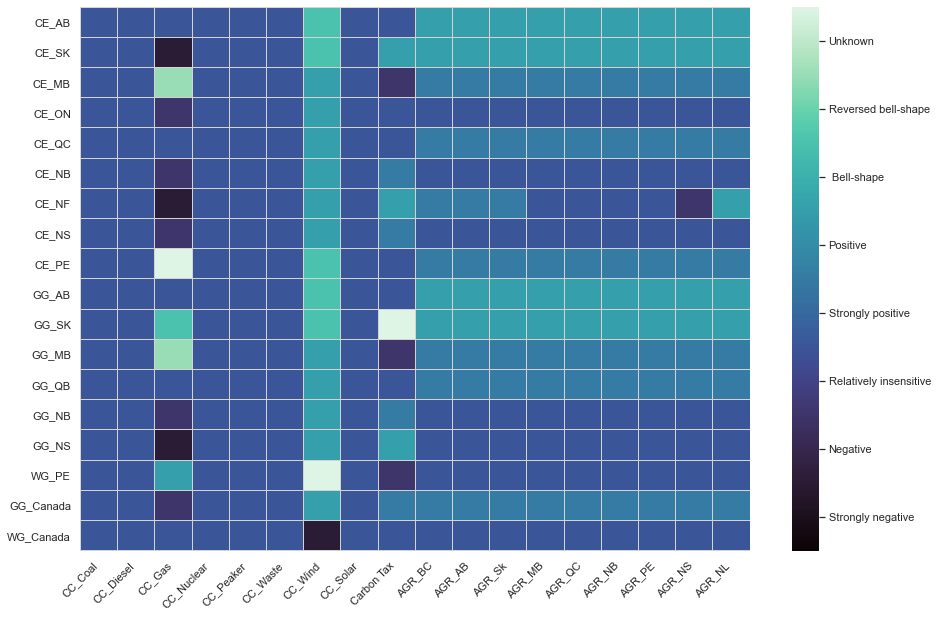

In [52]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# plot a heatmap
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(df_2030_2, linewidths=0.005, linecolor='lightgray', robust=True, fmt="f", cmap="mako", vmin=0, vmax=8)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks( [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], update_ticks=True)
colorbar.set_ticklabels(['Strongly negative', 'Negative', 'Relatively insensitive', 'Strongly positive', 'Positive', ' Bell-shape',  'Reversed bell-shape', 'Unknown'])


_, labels = plt.xticks()
plt.setp(labels, rotation=45, horizontalalignment='right')
plt.savefig('heatmap2030_named.png')


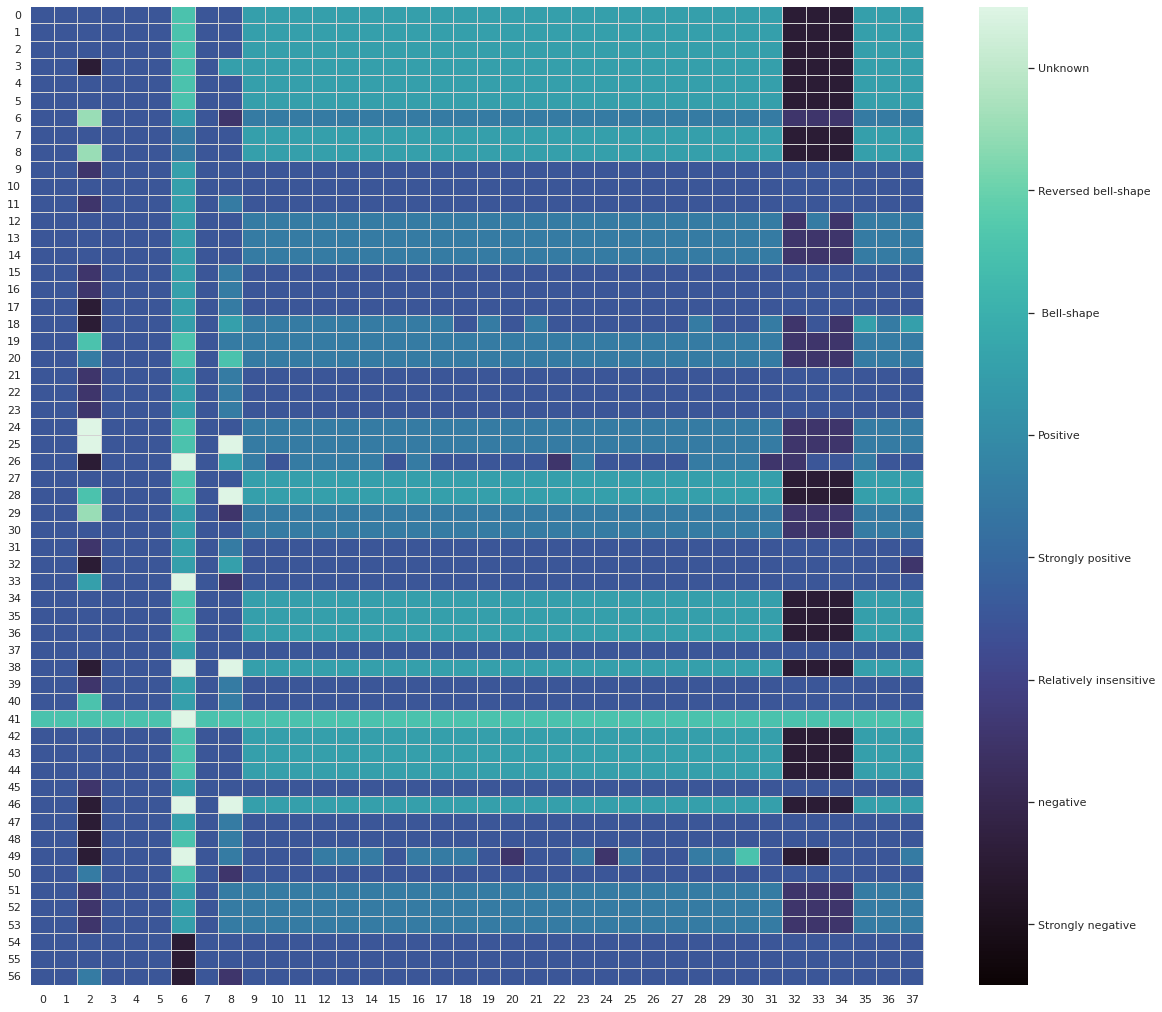

In [30]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# plot a heatmap
sns.set(rc = {'figure.figsize':(20,18)})
ax = sns.heatmap(df, linewidths=0.005, linecolor='lightgray', robust=True, fmt="f", cmap="mako", vmin=0, vmax=8)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks( [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], update_ticks=True)
colorbar.set_ticklabels(['Strongly negative', 'negative', 'Relatively insensitive', 'Strongly positive', 'Positive', ' Bell-shape',  'Reversed bell-shape', 'Unknown'])




# X - Y axis labels
# ax.set_ylabel('Outputs')
# ax.set_xlabel('Inputs')

# Only y-axis labels need their rotation set, x-axis labels already have a rotation of 0
_, labels = plt.yticks()
plt.setp(labels, rotation=0)
plt.savefig('heatmap.png')
# sns.palplot(sns.diverging_palette(200, 100, n=11))
# sns.color_palette(palette=None, n_colors=8, desat=None, as_cmap=False,  )
# sns.color_palette("rocket", as_cmap=True)